In [1]:
from matplotlib.pyplot import axis, figure, scatter, show, subplot, title
import numpy as np
from sklearn.manifold import TSNE


The dataset has 1000 samples, each sample has 2 dims


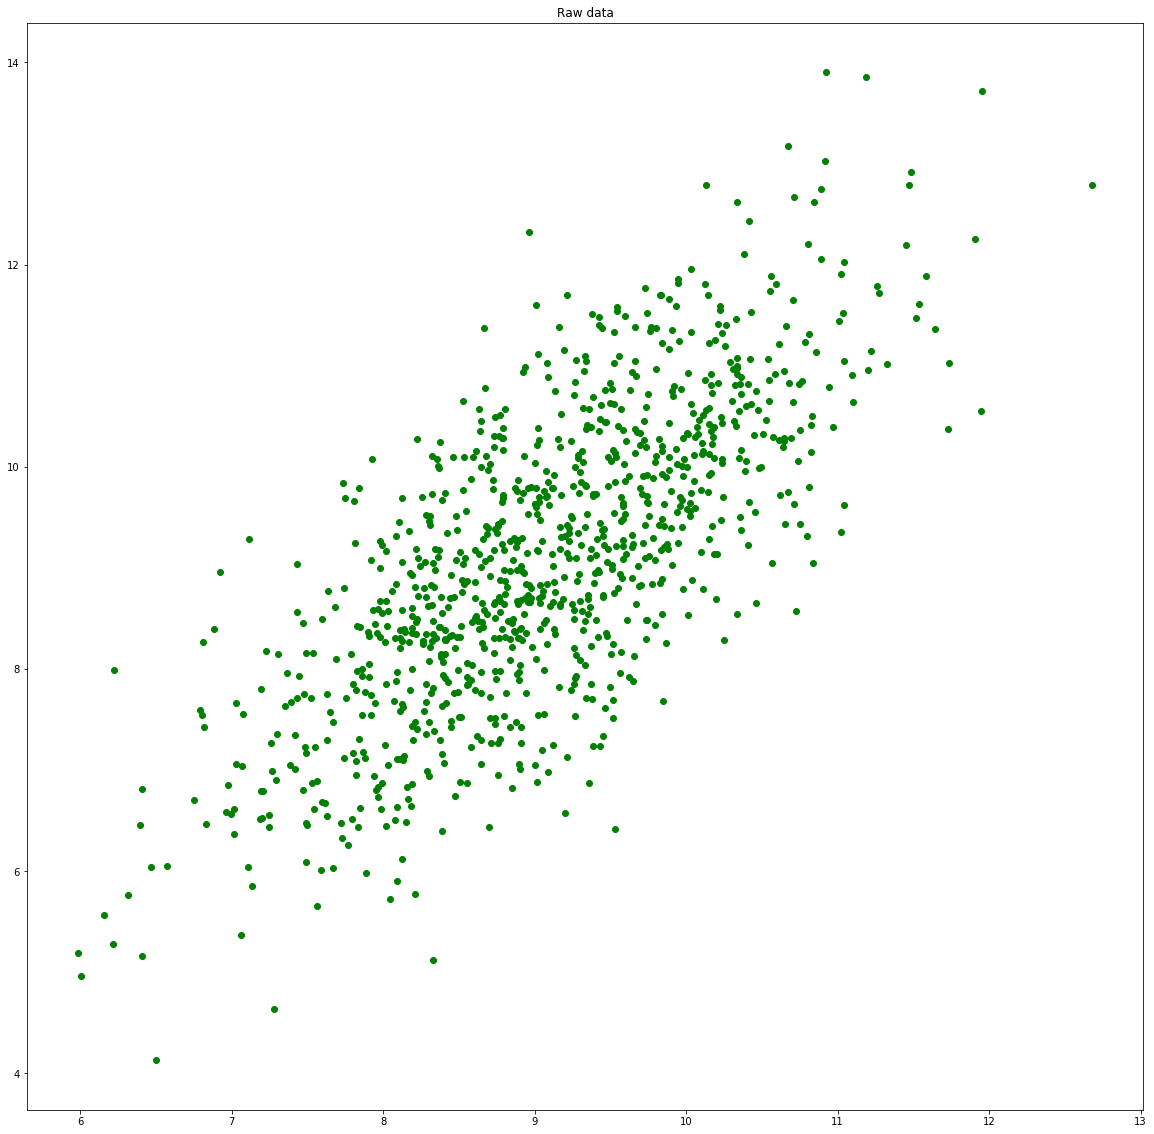

In [2]:
dataset_raw = np.loadtxt('test_points.txt', dtype='float32')
n_samples, n_dims = dataset_raw.shape
print(f'The dataset has {n_samples} samples, each sample has {n_dims} dims')
figure(figsize=(20, 20))
title('Raw data')
scatter(dataset_raw[:, 0], dataset_raw[:, 1], color='g')

Text(0.5, 1.0, 'Decenterlized data')

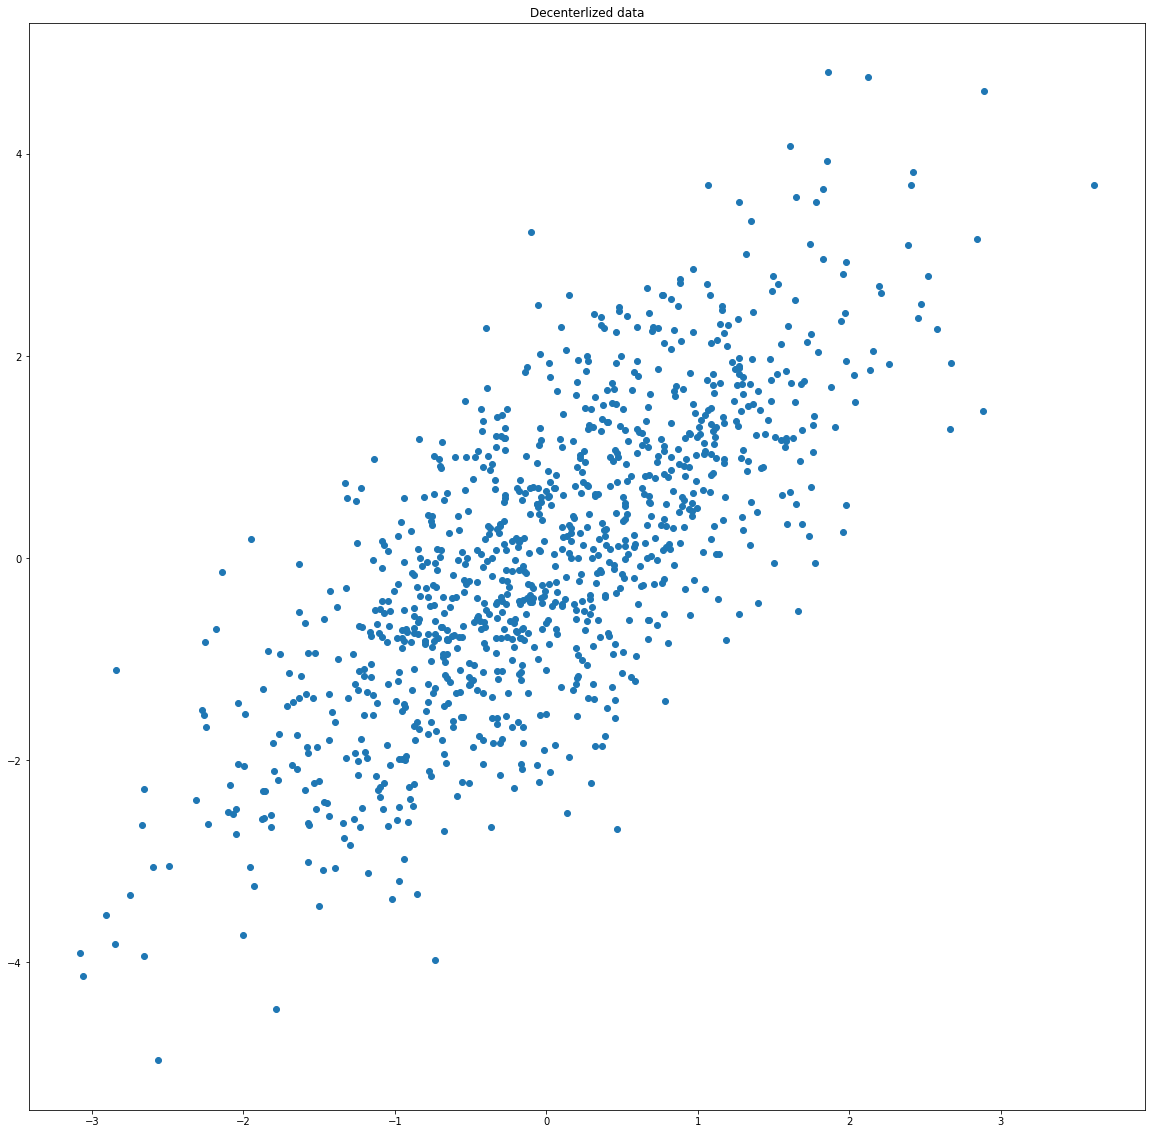

In [3]:

# Decenterlize.
dataset_decentered = dataset_raw - np.mean(dataset_raw, axis=0)
figure(figsize=(20, 20))
scatter(dataset_decentered[:, 0], dataset_decentered[:, 1])
title('Decenterlized data')

In [4]:
dataset_decentered -= np.mean(dataset_decentered, axis=0)
covariance = dataset_decentered.T @ dataset_decentered / (n_samples - 1)
eig_vals, eig = np.linalg.eig(covariance)

print('Covariance matrix:\n', covariance)
print('\nEigen values:\n\t1\t2\n', eig_vals)
print('\nEigens:\n\t1\t2\n', eig)

Covariance matrix:
 [[1.0519836 1.1246312]
 [1.1246312 2.2116647]]

Eigen values:
	1	2
 [0.36651376 2.8971345 ]

Eigens:
	1	2
 [[-0.85389096 -0.52045196]
 [ 0.52045196 -0.85389096]]


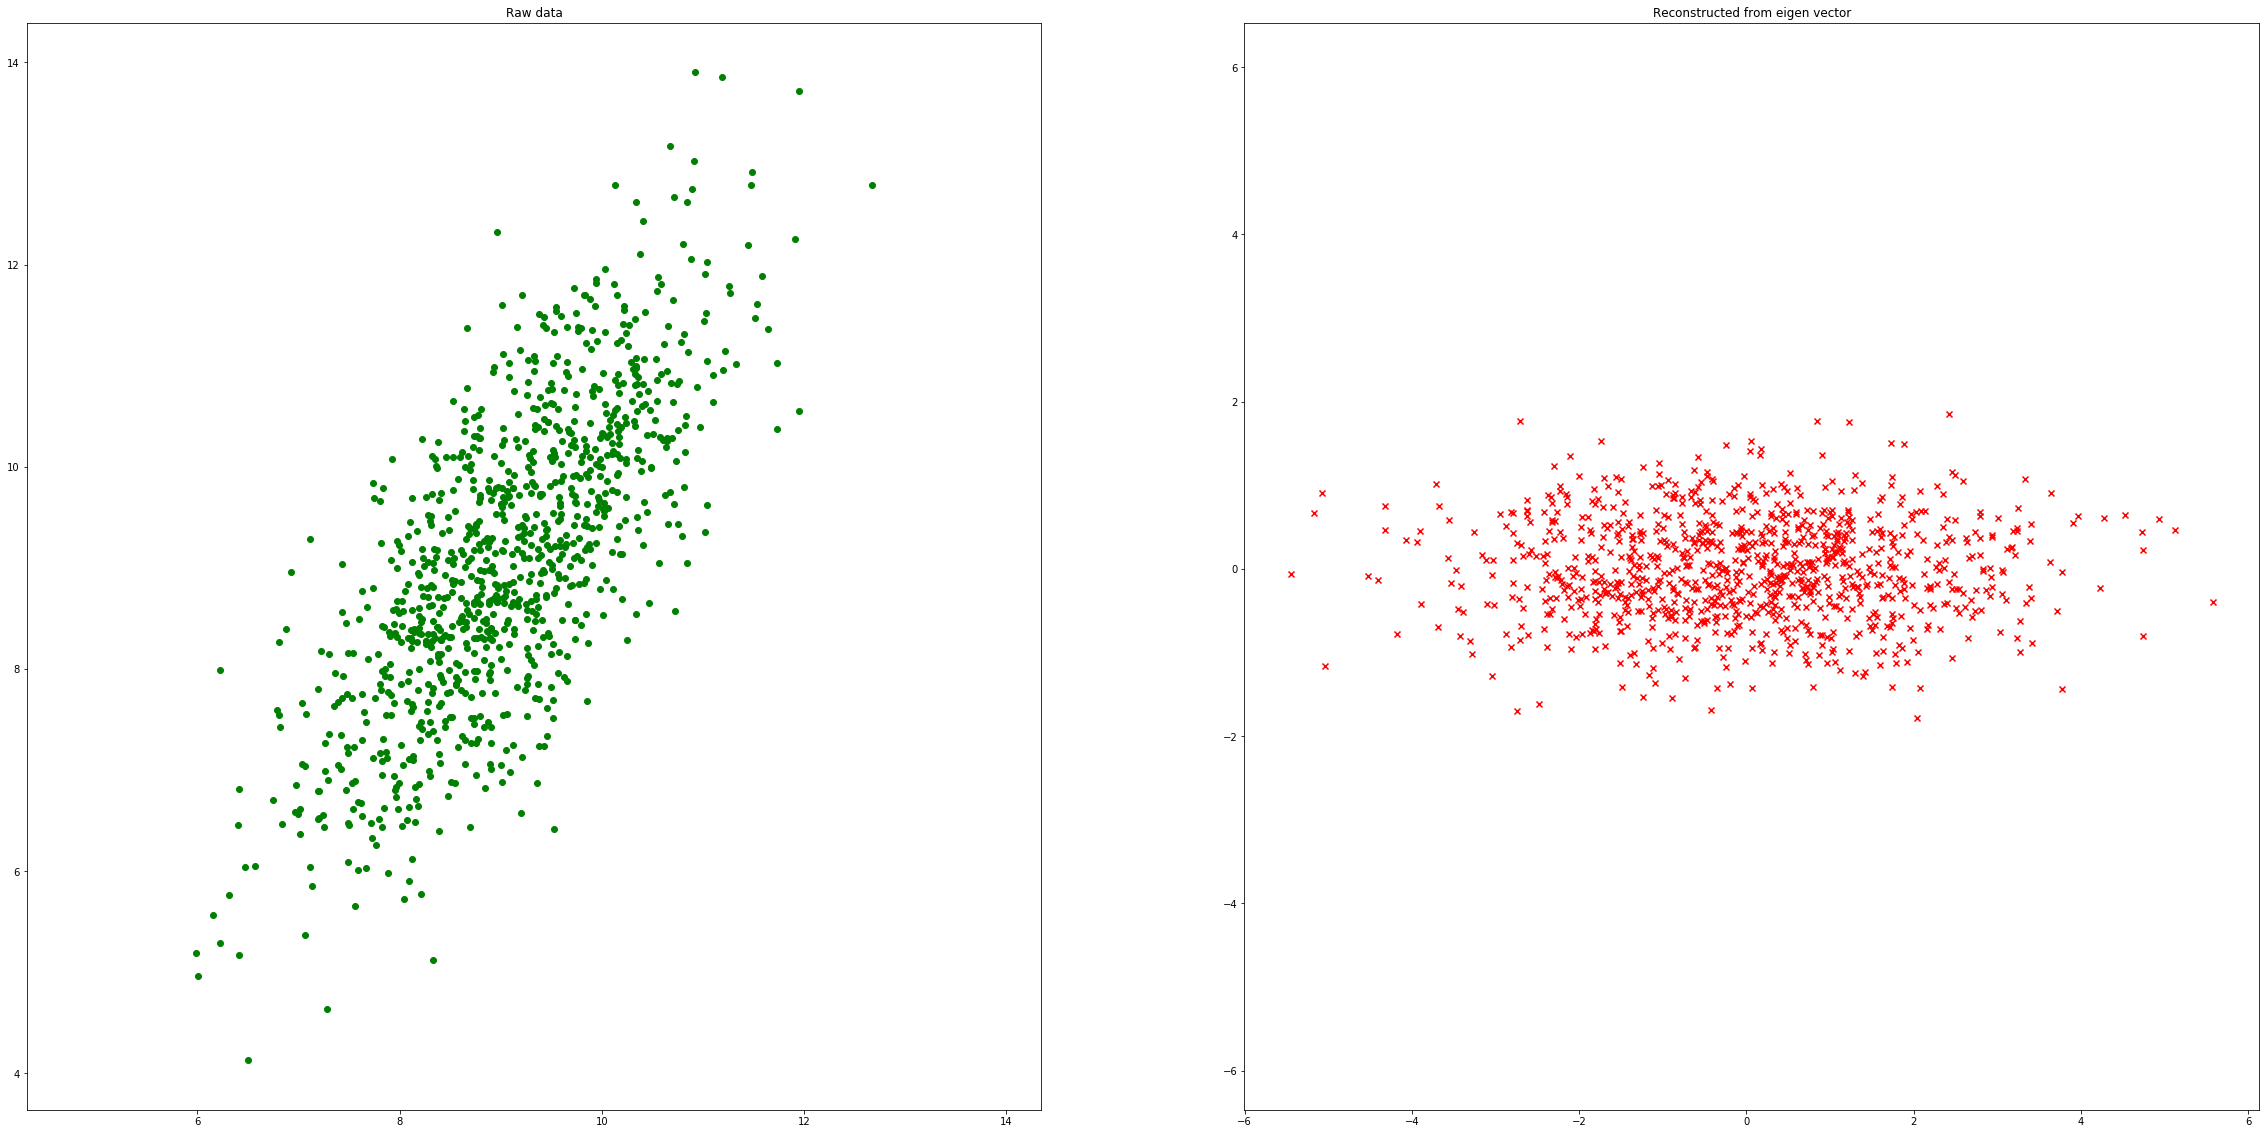

In [5]:
topk = 2
topk_idx = np.argsort(eig_vals, kind='stable')[::-1][:topk]
topk_eigs = eig[:, topk_idx]
reconstructed = dataset_decentered @ topk_eigs

figure(figsize=(40, 20))
ax = subplot(1, 2, 1)
ax.set_title("Raw data")
axis('equal')
scatter(dataset_raw[:, 0], dataset_raw[:, 1], c='g', marker='o')

ax = subplot(1, 2, 2)
ax.set_title("Reconstructed from eigen vector")
axis('equal')
scatter(reconstructed[:, 0], reconstructed[:, 1], c='r', marker='x')
show()

In [6]:
def load_mnist_images(filename, dtype='uint8'):
    """Output: A 3-d array with shape of [N, height, width]."""
    with open(filename, 'rb') as f:
        f.read(4)
        n_samples = int.from_bytes(f.read(4), byteorder="big")
        n_rows = int.from_bytes(f.read(4), byteorder="big")
        n_cols = int.from_bytes(f.read(4), byteorder="big")

        images = np.empty((n_samples, n_rows * n_cols), dtype=dtype)
        for i in range(n_samples):
            for value in range(n_rows * n_cols):
                images[i][value] = int.from_bytes(f.read(1), byteorder="big")
        images = np.ascontiguousarray(images.reshape((-1, n_rows, n_cols)))

    return images


def load_mnist_labels(filename, dtype='uint8'):
    """Output An 1-d array with shape of [N,]."""
    with open(filename, 'rb') as f:
        f.read(4)
        n_samples = int.from_bytes(f.read(4), byteorder="big")
        labels = np.empty(n_samples, dtype=dtype)
        for i in range(n_samples):
            labels[i] = int.from_bytes(f.read(1), byteorder="big")

    return labels

def pca(dataset, topk):
    """dataset: A 2d array with shape of [N, d]."""
    n_samples, n_dims = dataset.shape

    dataset -= np.mean(dataset, axis=0)

    dataset -= np.mean(dataset, axis=0)
    covariance = dataset.T @ dataset / (n_samples - 1)
    eig_vals, eig = np.linalg.eig(covariance)

    topk_idx = np.argsort(eig_vals, kind='stable')[::-1][:topk]
    topk_eigs = eig[:, topk_idx]
    reconstructed = dataset @ topk_eigs
    return reconstructed


images = load_mnist_images('mnist-test', dtype='float32')
labels = load_mnist_labels('mnist-test-labels', dtype='uint8')

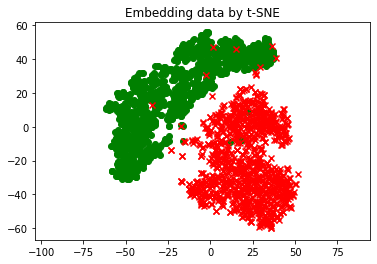

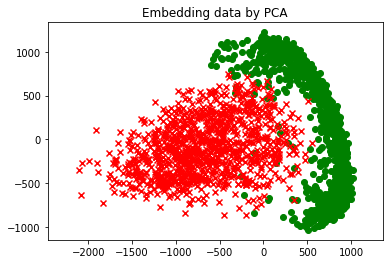

In [7]:

a_img = images[labels == 1]
b_img = images[labels == 2]
height, width = images.shape[1:]
data = np.concatenate([a_img, b_img]).reshape((-1, height * width))

# t-SNE
tsne_embedded = TSNE(n_components=2).fit_transform(data)

# Spliting data & ploting.
a_out = tsne_embedded[range(len(a_img)), :]
b_out = tsne_embedded[range(len(a_img), len(data)), :]
figure()
axis('equal')
title('Embedding data by t-SNE')
scatter(a_out[:, 0], a_out[:, 1], c='g', marker='o')
scatter(b_out[:, 0], b_out[:, 1], c='r', marker='x')


pca_embedded = pca(data, topk=2)

# Spliting data & ploting.
a_out = pca_embedded[range(len(a_img)), :]
b_out = pca_embedded[range(len(a_img), len(data)), :]
figure()
axis('equal')
title('Embedding data by PCA')
scatter(a_out[:, 0], a_out[:, 1], c='g', marker='o')
scatter(b_out[:, 0], b_out[:, 1], c='r', marker='x')
show()
